<a href="https://colab.research.google.com/github/diegosfc91/EJERCICIOS-DE-CORE-Machine-Learning/blob/main/Proyecto_1_Parte_final_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Exploración y Visualización de Datos (EDA)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

Primeras filas del dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50

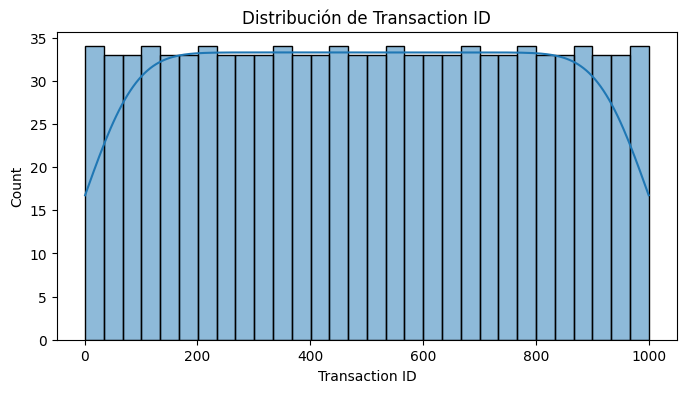

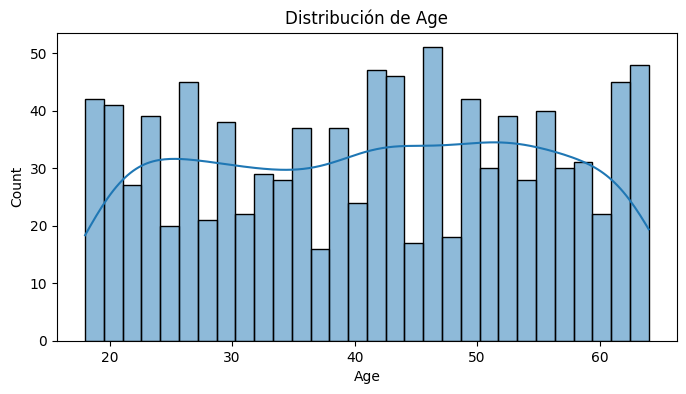

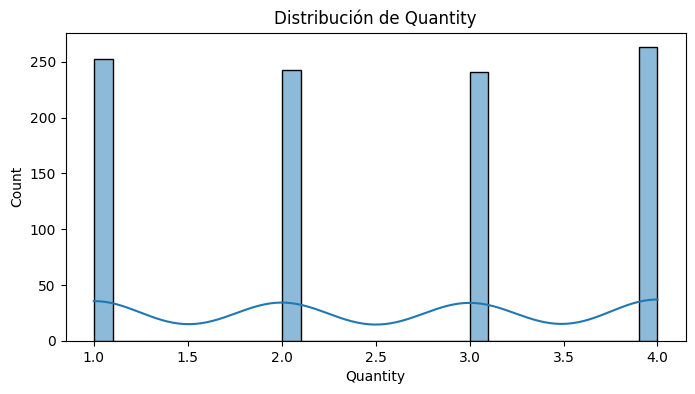

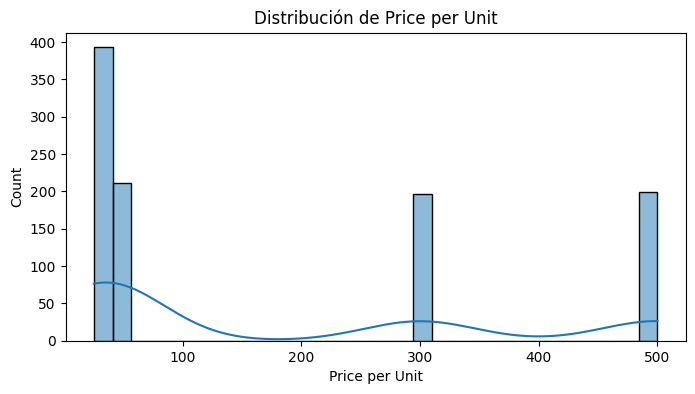

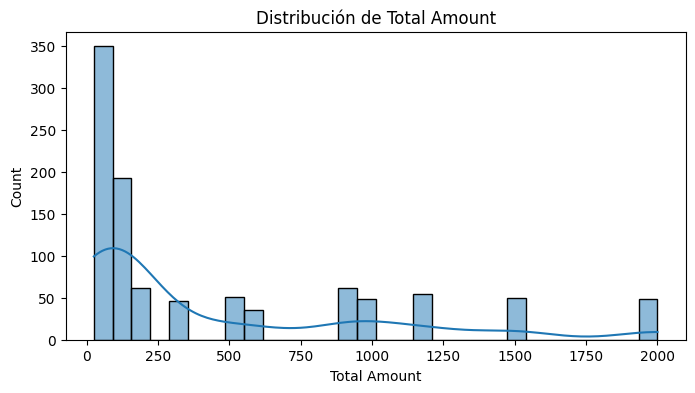


Valores nulos por columna:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Descripción estadística después del tratamiento de outliers:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


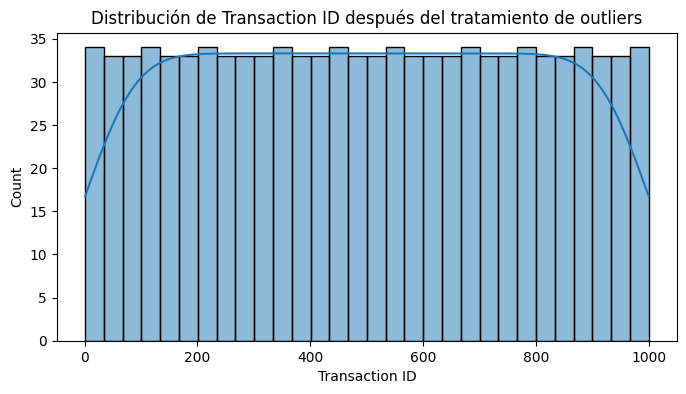

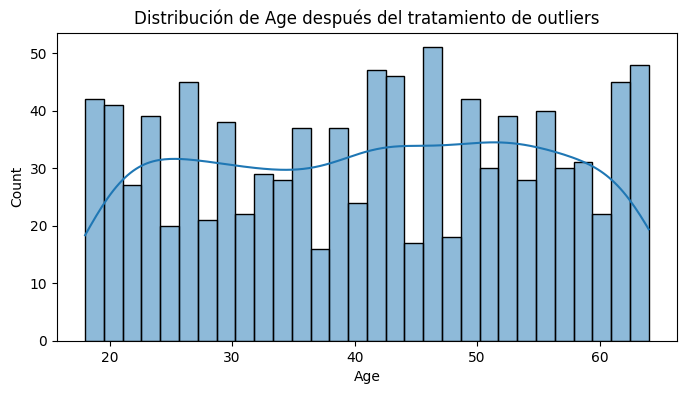

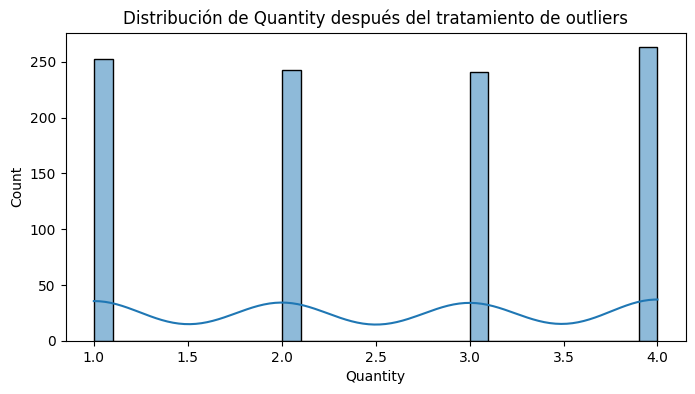

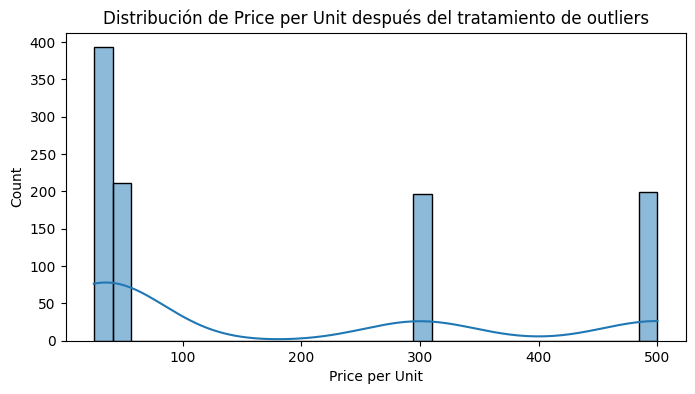

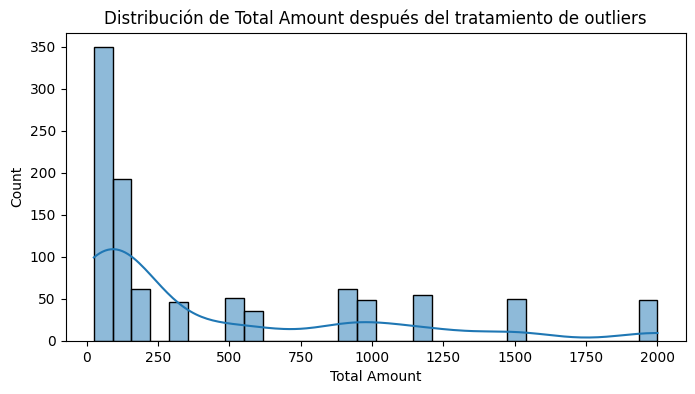

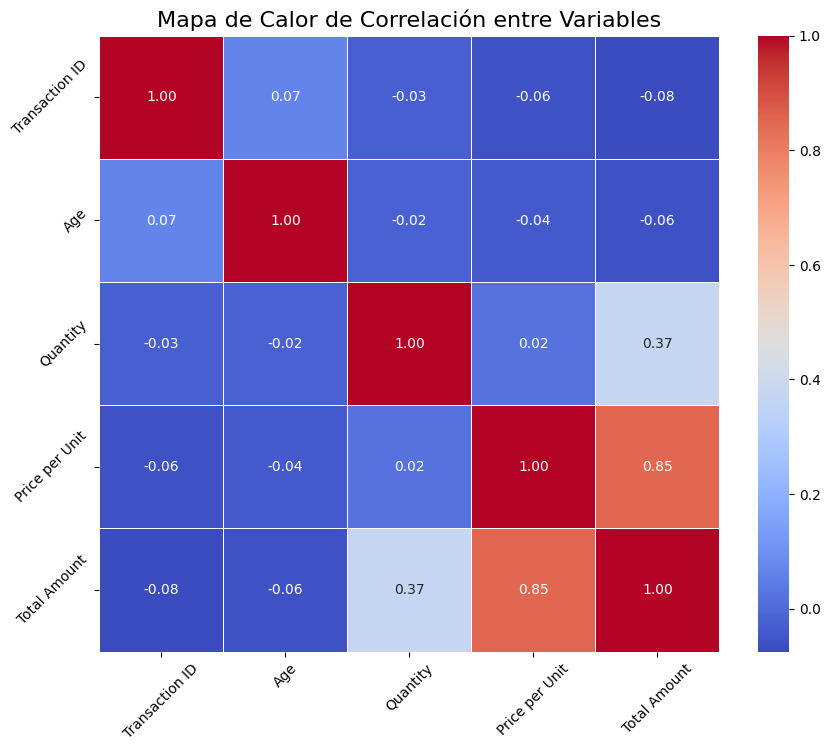

<ipython-input-9-ec0586e1d661>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


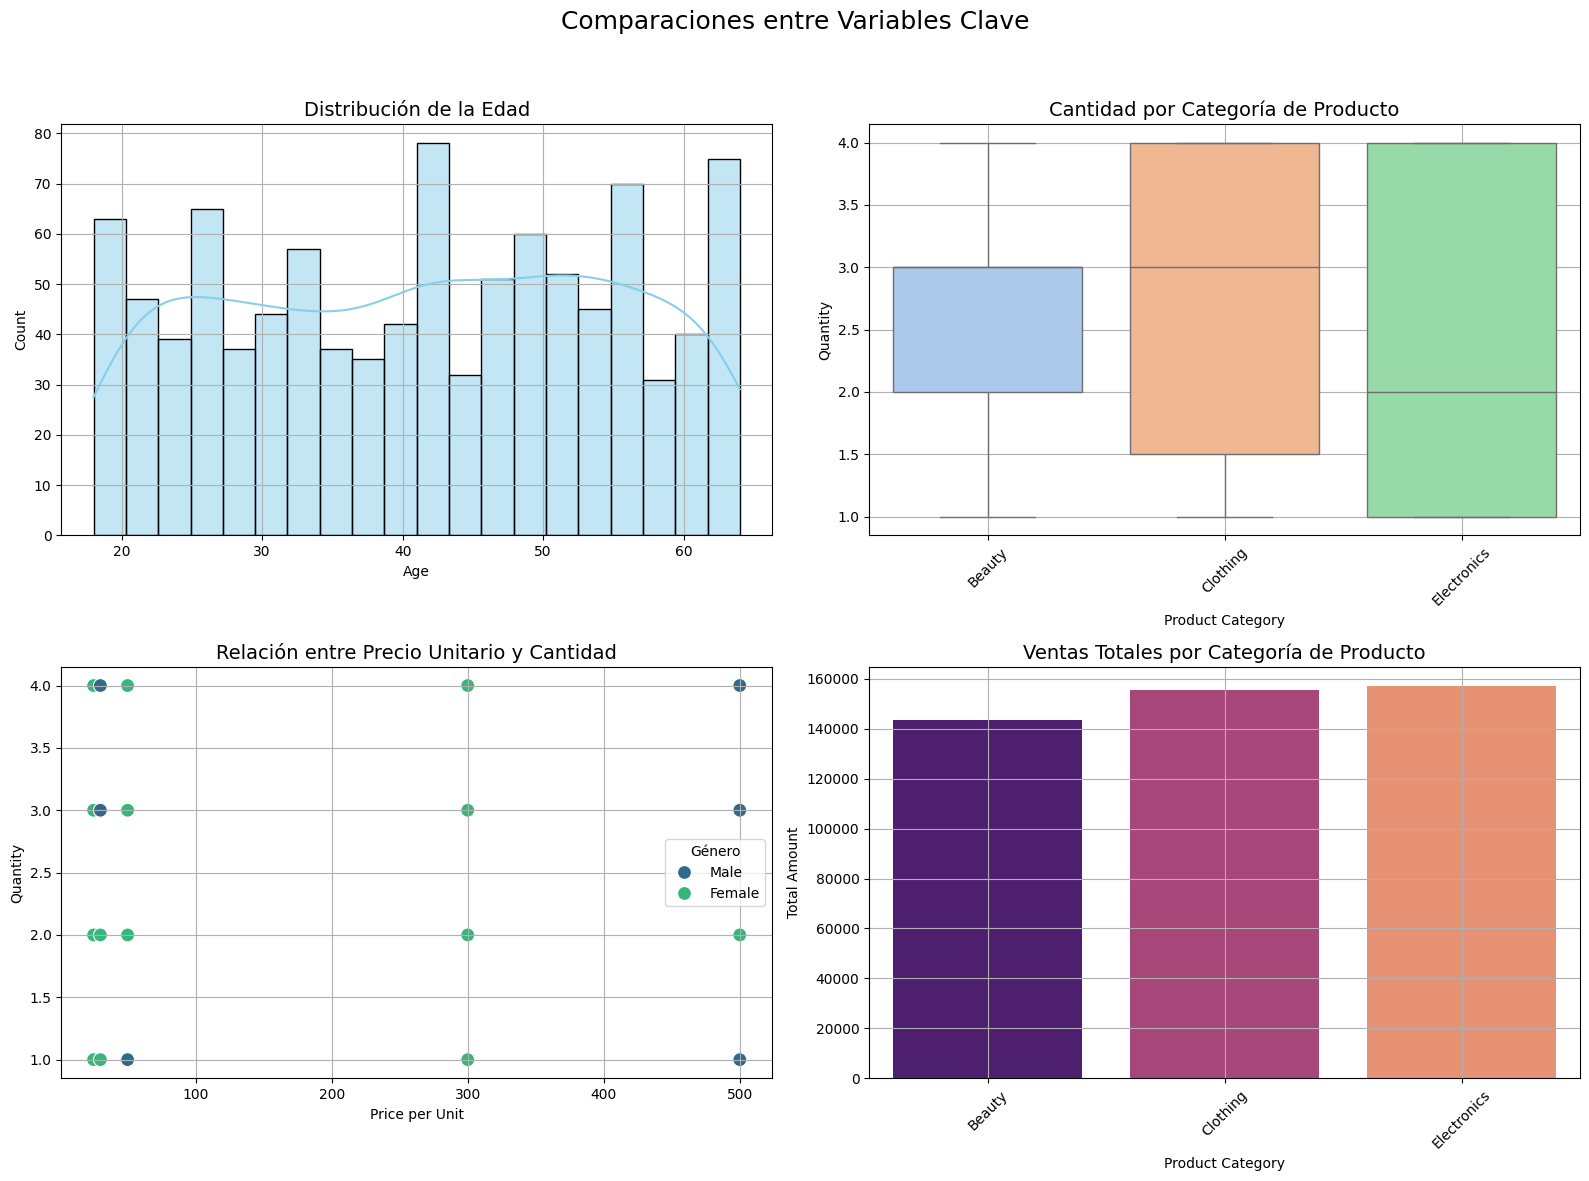

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# 1. Cargar el dataset
file_path = '/content/retail_sales_dataset.csv'
data = pd.read_csv(file_path)

# 1.1 Revisar la estructura básica del dataset
print("Información del dataset:")
print(data.info())

print("\nPrimeras filas del dataset:")
print(data.head())

# 2. Descripción de las variables y su distribución
print("\nDescripción estadística de las variables:")
print(data.describe())

# Visualizar la distribución de las variables numéricas
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.show()

# 3. Identificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# 4. Tratamiento de valores nulos con SimpleImputer
# Configurar el imputador para reemplazar valores nulos con la mediana
imputer = SimpleImputer(strategy='median')
columns_with_nans = data.columns[data.isnull().any()]  # Columnas con valores nulos

if not columns_with_nans.empty:
    data[columns_with_nans] = imputer.fit_transform(data[columns_with_nans])
    print("\nValores nulos tratados usando SimpleImputer.")

# 5. Identificar y tratar outliers usando el rango intercuartil (IQR)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Reemplazar valores fuera del rango con los límites
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# 6. Verificar nuevamente después del tratamiento
print("\nDescripción estadística después del tratamiento de outliers:")
print(data.describe())

# Visualizar las distribuciones después de tratar los outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribución de {column} después del tratamiento de outliers')
    plt.show()

# Guardar el dataset tratado si es necesario
# data.to_csv('WineQT_cleaned.csv', index=False)
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_data = data.select_dtypes(include=[np.number])
# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = numeric_data.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# =============================
# Visualización de Datos
# =============================

# Subplots para visualización
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparaciones entre Variables Clave', fontsize=18)

# Gráfico 1: Distribución de la edad
sns.histplot(data['Age'], kde=True, ax=axs[0, 0], bins=20, color='skyblue')
axs[0, 0].set_title('Distribución de la Edad', fontsize=14)
axs[0, 0].grid(True)

# Gráfico 2: Cantidad por Categoría de Producto
sns.boxplot(
    x='Product Category',
    y='Quantity',
    data=data,
    ax=axs[0, 1],
    palette='pastel',
    hue='Product Category'  # Añadir hue para evitar advertencia
)
axs[0, 1].set_title('Cantidad por Categoría de Producto', fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=45)  # Ajuste de rotación de etiquetas
axs[0, 1].grid(True)

# Gráfico 3: Relación entre Precio Unitario y Cantidad
sns.scatterplot(
    x='Price per Unit',
    y='Quantity',
    hue='Gender',
    data=data,
    ax=axs[1, 0],
    s=100,
    palette='viridis'
)
axs[1, 0].set_title('Relación entre Precio Unitario y Cantidad', fontsize=14)
axs[1, 0].legend(title='Género')
axs[1, 0].grid(True)

# Gráfico 4: Ventas Totales por Categoría de Producto
category_totals = data.groupby('Product Category')['Total Amount'].sum().reset_index()
sns.barplot(
    x='Product Category',
    y='Total Amount',
    data=category_totals,
    ax=axs[1, 1],
    palette='magma',
    hue=None  # Ajuste para evitar advertencia de futuras versiones
)
axs[1, 1].set_title('Ventas Totales por Categoría de Producto', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

# Parte 2: Preprocesamiento de Datos

In [15]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separar características y etiqueta (suponiendo 'Total Amount' como etiqueta)
X = data.drop(columns=['Total Amount', 'Transaction ID', 'Date'])  # Quitar columnas irrelevantes
y = data['Total Amount']

# Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# Transformación de Columnas
# =============================

# Identificar columnas categóricas y numéricas
categorical_columns = ['Customer ID', 'Gender', 'Product Category']
numerical_columns = ['Age', 'Quantity', 'Price per Unit']

# Crear transformadores para cada tipo de dato
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Asegurar que no sea sparse
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Escalado de variables numéricas
])

# Combinar transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),  # Transformación para numéricas
        ('cat', categorical_transformer, categorical_columns)  # Transformación para categóricas
    ]
)

# =============================
# Crear Pipeline Completo
# =============================

data_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicar el pipeline a los datos de entrenamiento y prueba
X_train_preprocessed = data_pipeline.fit_transform(X_train)
X_test_preprocessed = data_pipeline.transform(X_test)

# =============================
# Convertir Datos Transformados a DataFrame
# =============================

# Validar la forma de X_train_preprocessed
print("Forma del conjunto transformado:", X_train_preprocessed.shape)

# Obtener nombres de columnas categóricas transformadas
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)

# Combinar nombres categóricos y numéricos
final_feature_names = list(categorical_feature_names) + numerical_columns

# Verificar si las dimensiones coinciden
if X_train_preprocessed.shape[1] == len(final_feature_names):
    X_train_df = pd.DataFrame(X_train_preprocessed, columns=final_feature_names)
else:
    print(f"Error: las dimensiones no coinciden. Datos transformados: {X_train_preprocessed.shape[1]}, nombres esperados: {len(final_feature_names)}")
    raise ValueError("Las dimensiones de los datos transformados y los nombres de las columnas no coinciden.")

# Resetear índices para mantener alineación
X_train_df.reset_index(drop=True, inplace=True)

# =============================
# Verificar el Resultado
# =============================

print("Shape del conjunto de entrenamiento original:", X_train.shape)
print("Shape del conjunto de entrenamiento preprocesado:", X_train_preprocessed.shape)

print("\nVista previa del conjunto de entrenamiento preprocesado:")
print(X_train_df.head())



Forma del conjunto transformado: (800, 808)
Shape del conjunto de entrenamiento original: (800, 6)
Shape del conjunto de entrenamiento preprocesado: (800, 808)

Vista previa del conjunto de entrenamiento preprocesado:
   Customer ID_CUST001  Customer ID_CUST002  Customer ID_CUST003  \
0            -0.207312             0.440594             0.642467   
1             0.967885             1.326212            -0.780553   
2             0.600636             1.326212            -0.675144   
3            -0.060412            -1.330640            -0.806905   
4            -1.749759             0.440594            -0.780553   

   Customer ID_CUST004  Customer ID_CUST005  Customer ID_CUST006  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0           

# Parte 3: Benchmarking de Técnicas de Machine Learning

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# =============================
# Sobremuestreo para Clases Desequilibradas
# =============================

# Aplicar SMOTE para aumentar las clases minoritarias
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# =============================
# Manejo de Clases Desequilibradas
# =============================

# Calcular pesos balanceados para clases
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# =============================
# Definir Modelos con Pesos
# =============================

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

# =============================
# Validación Cruzada y Evaluación
# =============================

# Estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar resultados
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}")

    # Validación cruzada
    accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision_macro', error_score='raise').mean()
    recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall_macro', error_score='raise').mean()
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro', error_score='raise').mean()
    roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc_ovr', error_score='raise').mean()

    # Guardar resultados
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)

# =============================
# Comparar Modelos
# =============================

# Convertir resultados a DataFrame para análisis
results_df = pd.DataFrame(results)

# Ordenar por F1-Score
results_df = results_df.sort_values(by='F1-Score', ascending=False)

# Mostrar los resultados
print("\nResultados de la Comparación de Modelos:")
print(results_df)




Entrenando modelo: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Entrenando modelo: K-Nearest Neighbors


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Entrenando modelo: Random Forest

Resultados de la Comparación de Modelos:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2        Random Forest  0.761111   0.778223  0.761111  0.763672  0.945725
0  Logistic Regression  0.700000   0.707752  0.700000  0.682045  0.902170
1  K-Nearest Neighbors  0.555556   0.544812  0.555556  0.527029  0.890337


# Parte 4: Análisis de Métricas


Evaluación del Mejor Modelo: Random Forest

Informe de Clasificación:
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         5
        30.0       0.00      0.00      0.00         6
        50.0       0.16      0.38      0.22        13
        60.0       0.00      0.00      0.00         5
        75.0       0.00      0.00      0.00         4
        90.0       0.00      0.00      0.00         4
       100.0       0.11      0.18      0.13        11
       120.0       0.00      0.00      0.00         5
       150.0       0.00      0.00      0.00         4
       200.0       0.00      0.00      0.00         6
       300.0       0.00      0.00      0.00         4
       500.0       0.00      0.00      0.00         5
       600.0       1.00      0.00      0.00         4
       900.0       0.17      0.17      0.17         6
      1000.0       1.00      0.00      0.00         5
      1200.0       0.00      0.00      0.00         6
      1500.

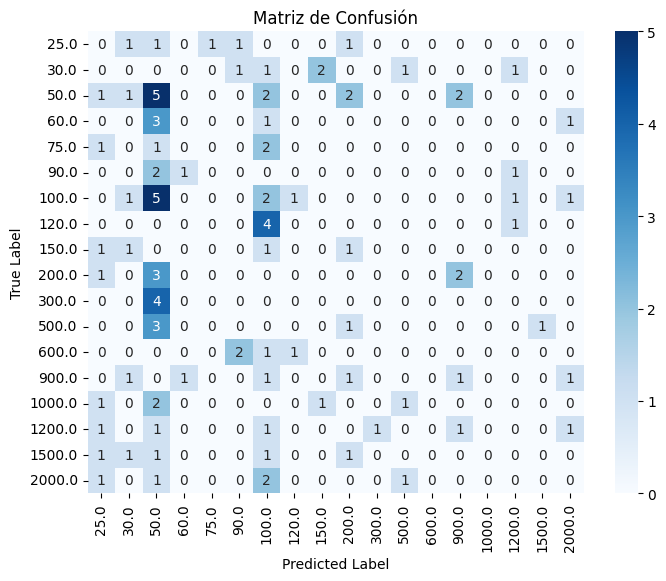

AUC (One-vs-Rest): 0.54


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

# =============================
# Generar Informe de Clasificación
# =============================

# Evaluar en el conjunto de validación
print(f"Evaluación del Mejor Modelo: {best_model_name}")
y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val) if hasattr(best_model, "predict_proba") else None

# Generar informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_val, y_val_pred, zero_division=1))

# =============================
# Matriz de Confusión
# =============================

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

# =============================
# Curva ROC y AUC
# =============================

if y_val_prob is not None:
    # Calcular ROC y AUC solo si se dispone de probabilidades
    if len(np.unique(y_val)) == 2:  # Para clasificación binaria
        fpr, tpr, thresholds = roc_curve(y_val, y_val_prob[:, 1])
        roc_auc = auc(fpr, tpr)

        # Graficar curva ROC
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

        print(f"AUC: {roc_auc:.2f}")

    else:  # Para clasificación multiclase
        roc_auc = roc_auc_score(y_val, y_val_prob, multi_class='ovr')
        print(f"AUC (One-vs-Rest): {roc_auc:.2f}")


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Usamos 5 vecinos como ejemplo

# Crear el pipeline completo (si ya tienes el preprocesador configurado)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', knn_model)
])

# Ajustar el modelo con los datos de entrenamiento
model_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo KNN en los datos de prueba: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Precisión del modelo KNN en los datos de prueba: 0.6472

Reporte de clasificación:
              precision    recall  f1-score   support

        Alta       0.00      0.00      0.00         4
        Baja       0.61      0.68      0.64       152
       Media       0.69      0.64      0.66       187

    accuracy                           0.65       343
   macro avg       0.43      0.44      0.43       343
weighted avg       0.65      0.65      0.64       343



# REGRESION LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Ajustar el modelo con pesos balanceados
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Crear el pipeline completo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', logistic_model)
])

# Dividir los datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ajustar el modelo
model_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo de Regresión Logística en los datos de prueba: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))



Precisión del modelo de Regresión Logística en los datos de prueba: 0.7085

Reporte de clasificación:
              precision    recall  f1-score   support

        Alta       0.00      0.00      0.00         5
        Baja       0.73      0.79      0.76       157
       Media       0.77      0.66      0.71       181

    accuracy                           0.71       343
   macro avg       0.50      0.48      0.49       343
weighted avg       0.74      0.71      0.72       343



#4. COMPARACION DE MODELOS


Métricas de Evaluación del Modelo:
Exactitud: 0.7085
Precisión: 0.7436
Recall: 0.7085
F1-Score: 0.7231


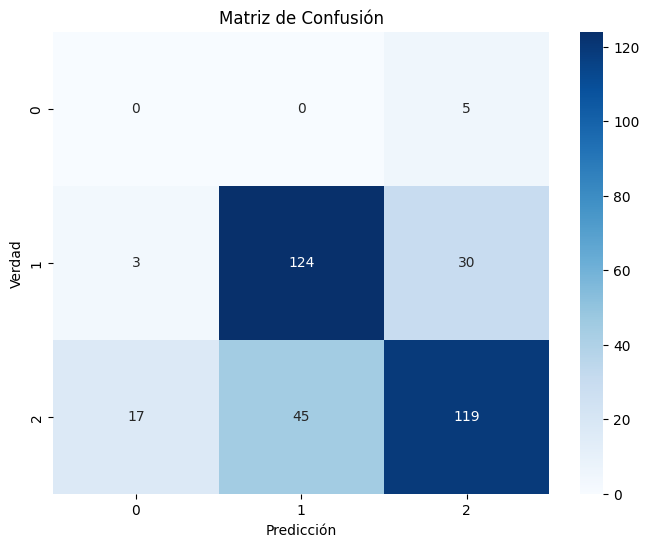


Reporte de Clasificación:
              precision    recall  f1-score   support

        Alta       0.00      0.00      0.00         5
        Baja       0.73      0.79      0.76       157
       Media       0.77      0.66      0.71       181

    accuracy                           0.71       343
   macro avg       0.50      0.48      0.49       343
weighted avg       0.74      0.71      0.72       343



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(



Métricas de Evaluación del Modelo:
Exactitud: 0.5044
Precisión: 0.5641
Recall: 0.5044
F1-Score: 0.4356


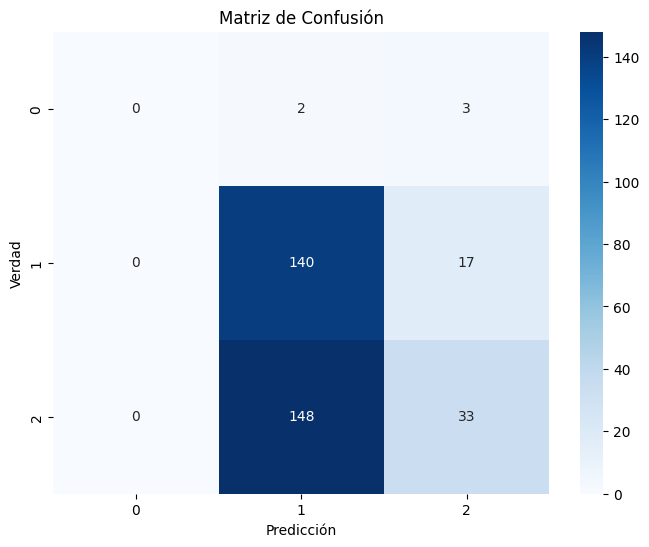


Reporte de Clasificación:
              precision    recall  f1-score   support

        Alta       1.00      0.00      0.00         5
        Baja       0.48      0.89      0.63       157
       Media       0.62      0.18      0.28       181

    accuracy                           0.50       343
   macro avg       0.70      0.36      0.30       343
weighted avg       0.56      0.50      0.44       343



In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Evaluar el modelo
def evaluate_model(model, X_test, y_test):
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas principales
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nMétricas de Evaluación del Modelo:")
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Verdad')
    plt.show()

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, zero_division=1))

    # Curva ROC y AUC
    if y_pred_proba is not None and len(y_test.unique()) == 2:  # Sólo para problemas binarios
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=y_test.unique()[1])
        auc = roc_auc_score(y_test, y_pred_proba)
        print(f"\nÁrea Bajo la Curva (AUC): {auc:.4f}")

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.title('Curva ROC')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc if y_pred_proba is not None and len(y_test.unique()) == 2 else None
    }

# Evaluar modelos existentes
logistic_results = evaluate_model(model_pipeline, X_test, y_test)
knn_results = evaluate_model(knn_model, X_test, y_test)


# ANALISIS Y COMPARACION DE RESULTADOS


Comparación de Modelos:
                Modelo  Exactitud  Precisión    Recall  F1-Score   AUC
0  Regresión Logística   0.708455   0.743612  0.708455  0.723110  None
1                  KNN   0.504373   0.564114  0.504373  0.435556  None


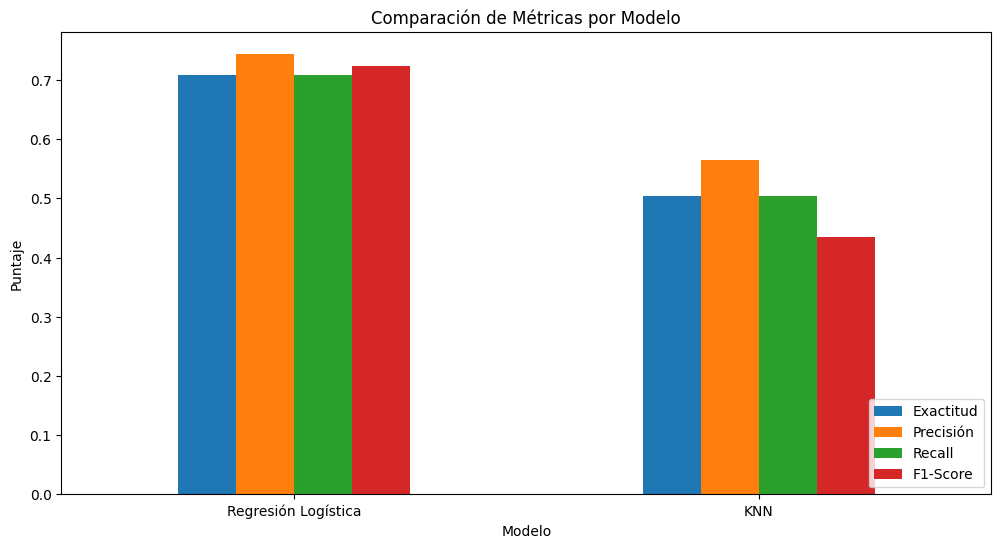


El mejor modelo es: Regresión Logística con un F1-Score de 0.7231


In [ ]:
# Comparar resultados de los modelos
results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'KNN'],
    'Exactitud': [logistic_results['accuracy'], knn_results['accuracy']],
    'Precisión': [logistic_results['precision'], knn_results['precision']],
    'Recall': [logistic_results['recall'], knn_results['recall']],
    'F1-Score': [logistic_results['f1_score'], knn_results['f1_score']],
    'AUC': [logistic_results['auc'], knn_results['auc']]
})

print("\nComparación de Modelos:")
print(results)

# Visualizar comparación
results.set_index('Modelo').plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas por Modelo')
plt.ylabel('Puntaje')
plt.xlabel('Modelo')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Conclusión
best_model = results.loc[results['F1-Score'].idxmax()]
print(f"\nEl mejor modelo es: {best_model['Modelo']} con un F1-Score de {best_model['F1-Score']:.4f}")
